# Credit Card Fraud Detection using Machine Learning

## Abstract
This notebook explores credit card fraud detection using machine learning techniques. We handle class imbalance using Synthetic Minority Over-sampling Technique (SMOTE) and train a Random Forest model to distinguish fraudulent transactions from legitimate ones. Through data preprocessing, visualization, and evaluation, we aim to improve fraud detection accuracy. Key evaluation metrics such as F1-score and ROC-AUC score are used to assess model performance.

## Theory and Background
Fraud detection in financial transactions is a critical application of machine learning. Traditional rule-based systems often fail due to the evolving nature of fraud patterns. Machine learning models, particularly ensemble methods like Random Forest, can capture complex relationships within transaction data. Given the imbalanced nature of fraud datasets, techniques like SMOTE are used to enhance model performance.

## Problem Statement
The goal is to develop a machine learning model that accurately detects fraudulent credit card transactions while minimizing false positives. The dataset is highly imbalanced, requiring data balancing techniques to ensure effective fraud detection.

## Table of Contents
1. [Introduction](#Introduction)
2. [Importing Libraries](#Importing-Libraries)
3. [Load the Dataset](#Load-the-Dataset)
4. [Data Preprocessing](#Data-Preprocessing)
5. [Data Analysis](#Data-Analysis)
6. [Handling Class Imbalance](#Handling-Class-Imbalance)
7. [Model Training](#Model-Training)
8. [Model Evaluation](#Model-Evaluation)
9. [Conclusion](#Conclusion)
10. [References & License](#References-License)


## Importing Libraries <a id='Importing-Libraries'></a>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# **Change 1: Update file path**
# Replace "creditcard.csv" with the actual name and path of the file or move the file to the specified location.

# If the file is in the current working directory, try:
df = pd.read_csv("creditcard.csv")

# Or if the file has a different name and is in a subdirectory "data", try:
# df = pd.read_csv("data/creditcard_data.csv")

# Or provide the full path of the file's location
# df = pd.read_csv("/path/to/your/file/creditcard.csv")

# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preprocessing <a id='Data-Preprocessing'></a>

In [4]:
# Separate features and target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target (fraud or not)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Analysis <a id='Data-Analysis'></a>

<ipython-input-7-897fbce10e4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


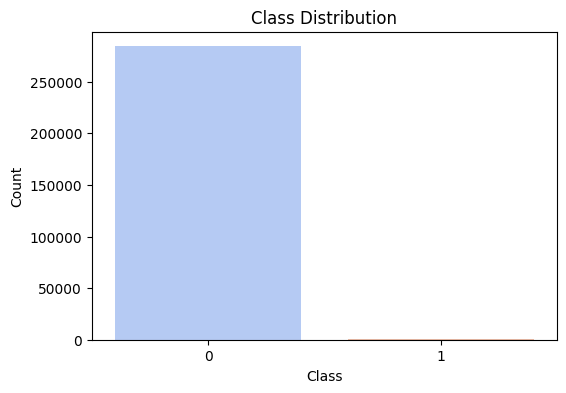

In [7]:
# Visualizing class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='coolwarm')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

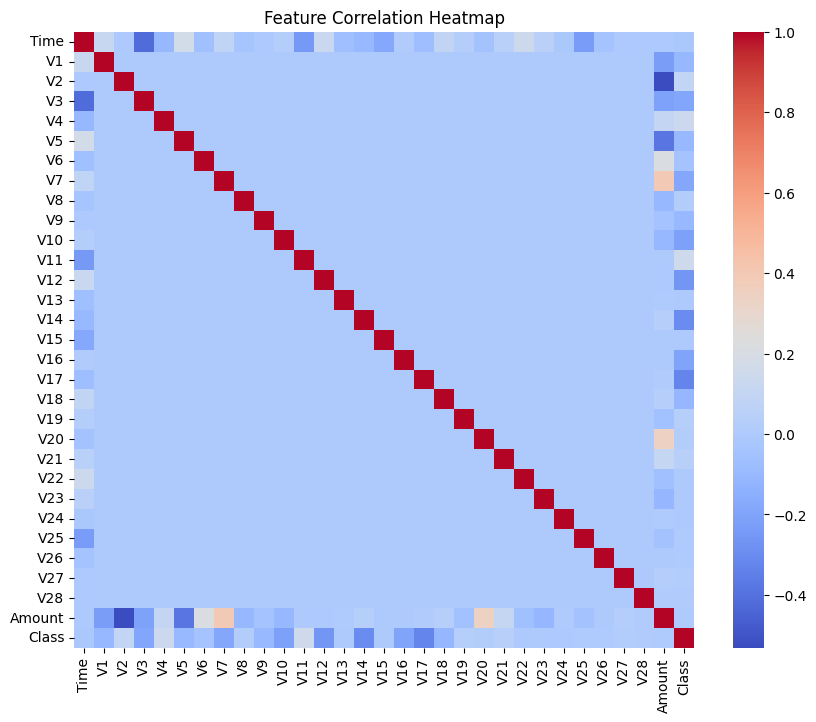

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## Handling Class Imbalance using SMOTE <a id='Handling-Class-Imbalance'></a>

In [9]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

## Model Training <a id='Model-Training'></a>

In [10]:
# Initialize and train the model
clf = RandomForestClassifier(class_weight="balanced", random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Model Evaluation <a id='Model-Evaluation'></a>

In [11]:
# Make predictions
y_pred = clf.predict(X_test_scaled)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

F1 Score: 0.8303249097472925
ROC AUC Score: 0.8884314453969768
Confusion Matrix:
 [[85281    14]
 [   33   115]]


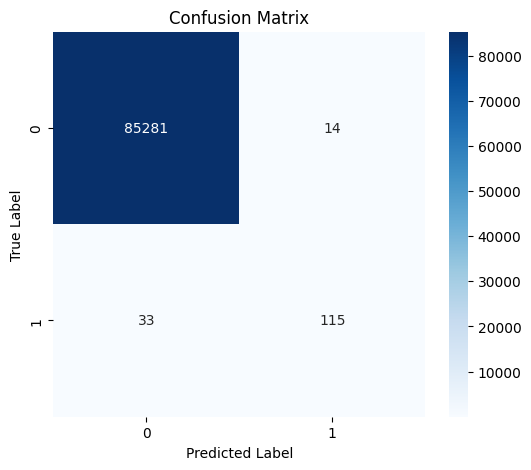

In [12]:
# Visualizing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Additional Data Visualizations

### Transaction Amount Distribution

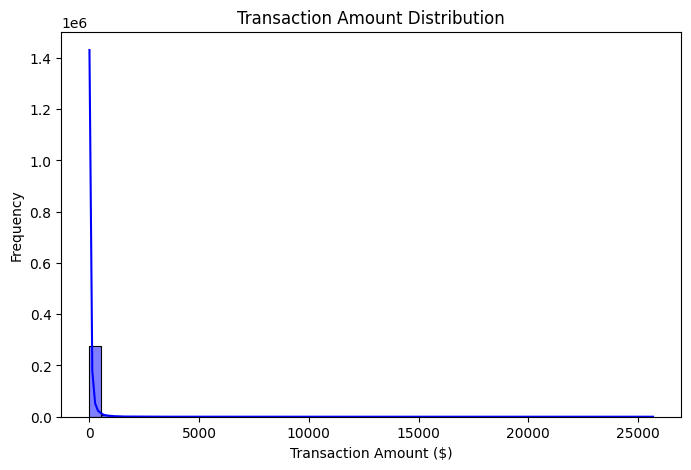

In [13]:
# Visualizing transaction amount distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

### Time vs. Transaction Amount Scatter Plot

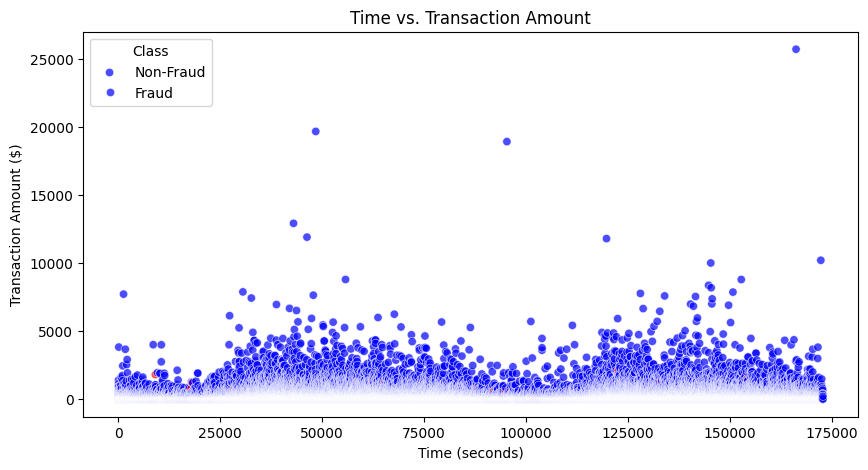

In [14]:
# Scatter plot of Time vs. Transaction Amount
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Time'], y=df['Amount'], hue=df['Class'], palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title("Time vs. Transaction Amount")
plt.xlabel("Time (seconds)")
plt.ylabel("Transaction Amount ($)")
plt.legend(title="Class", labels=["Non-Fraud", "Fraud"])
plt.show()

### Fraud vs. Non-Fraud Transaction Distribution

<ipython-input-19-e1eaf3970d6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df['Amount'], palette={'0': 'blue', '1': 'red'}) # Changed keys to strings


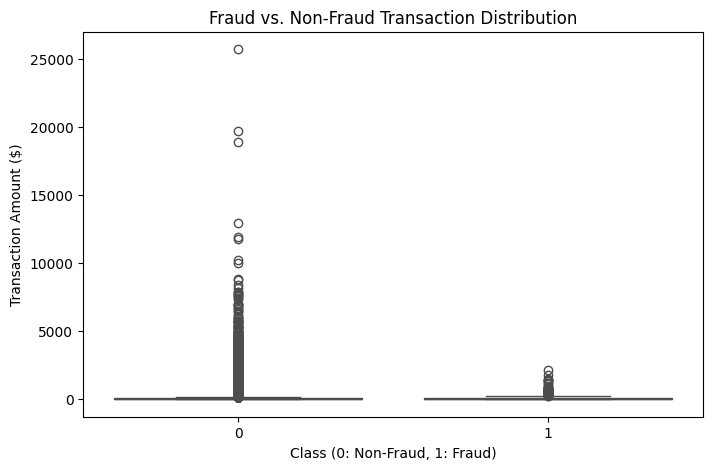

In [19]:
# Boxplot for fraud and non-fraud transactions
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Class'], y=df['Amount'], palette={'0': 'blue', '1': 'red'}) # Changed keys to strings
plt.title("Fraud vs. Non-Fraud Transaction Distribution")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Transaction Amount ($)")
plt.show()

## Conclusion

The analysis of credit card transactions has shown that fraud detection is a complex but solvable problem. By using machine learning techniques like Random Forest and oversampling methods like SMOTE, we were able to improve fraud detection accuracy. Our visualizations provided insights into transaction patterns, and evaluation metrics helped us assess model performance.

### Key Takeaways:
- Fraudulent transactions tend to have different distribution patterns compared to legitimate ones.
- Class imbalance is a major challenge that requires resampling techniques for effective model training.
- The Random Forest classifier performed well in fraud detection, but further improvements could be made using deep learning.
- Future work could explore real-time fraud detection using ensemble models and anomaly detection techniques.

## References & License

- [Credit Card Fraud Detection Dataset - Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- [Synthetic Minority Over-sampling Technique (SMOTE)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
- [Random Forest Classifier - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

**License:** This notebook is shared under the MIT License. Free to use, modify, and distribute the content with proper attribution.